### Imports

In [1]:
########## Imports ##########

import numpy as np
import pandas as pd
import fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re

from datetime import datetime
from time import time

# Outliers
from sklearn.ensemble import IsolationForest

In [2]:
########## Apparence ##########

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

# Choix d'une palette de couleurs
sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Analyse exploratoire des données (EDA)

### application_train.csv

In [3]:
########## df train -> avec target ##########
df_train = pd.read_csv('data/application_train.csv')
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Caractéristiques générales du jeu de données

In [5]:
df_train.shape

(307511, 122)

In [6]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
########## Duplicats ##########

fonctions.remove_duplicates(df_train)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 9152465

Pourcentage de valeurs manquantes : 24.4


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
COMMONAREA_MEDI                                      214865   
COMMONAREA_AVG                                       214865   
COMMONAREA_MODE                                      214865   
NONLIVINGAPARTMENTS_MEDI                             213514   
NONLIVINGAPARTMENTS_MODE                             213514   
NONLIVINGAPARTMENTS_AVG                              213514   
FONDKAPREMONT_MODE                                   210295   
LIVINGAPARTMENTS_MODE                                210199   
LIVINGAPARTMENTS_MEDI                                210199   
LIVINGAPARTMENTS_AVG                                 210199   
FLOORSMIN_MODE                                       208642   
FLOORSMIN_MEDI                                       208642   
FLOORSMIN_AVG                                        208642   
YEARS_BUILD_MODE                                     204488   
YEARS_BUILD_MEDI                                     204488   
YEARS_BUILD_AVG                                      204488   
OWN_CAR_AGE                                          202929   
LANDAREA_AVG                                         182590   
LANDAREA_MEDI                                        182590   
LANDAREA_MODE                                        182590   
BASEMENTAREA_MEDI                                    179943   
BASEMENTAREA_AVG                                     179943   
BASEMENTAREA_MODE                                    179943   
EXT_SOURCE_1                                         173378   
NONLIVINGAREA_MEDI                                   169682   
NONLIVINGAREA_MODE                                   169682   
NONLIVINGAREA_AVG                                    169682   
ELEVATORS_MEDI                                       163891   
ELEVATORS_MODE                                       163891   
ELEVATORS_AVG                                        163891   
WALLSMATERIAL_MODE                                   156341   
APARTMENTS_MODE                                      156061   
APARTMENTS_MEDI                                      156061   
APARTMENTS_AVG                                       156061   
ENTRANCES_MODE                                       154828   
ENTRANCES_AVG                                        154828   
ENTRANCES_MEDI                                       154828   
LIVINGAREA_MEDI                                      154350   
LIVINGAREA_MODE                                      154350   
LIVINGAREA_AVG                                       154350   
HOUSETYPE_MODE                                       154297   
FLOORSMAX_MEDI                                       153020   
FLOORSMAX_AVG                                        153020   
FLOORSMAX_MODE                                       153020   
YEARS_BEGINEXPLUATATION_AVG                          150007   
YEARS_BEGINEXPLUATATION_MEDI                         150007   
YEARS_BEGINEXPLUATATION_MODE                         150007   
TOTALAREA_MODE                                       148431   
EMERGENCYSTATE_MODE                                  145755   
OCCUPATION_TYPE                                       96391   
EXT_SOURCE_3                                          60965   
AMT_REQ_CREDIT_BUREAU_WEEK                            41519   
AMT_REQ_CREDIT_BUREAU_DAY                             41519   
AMT_REQ_CREDIT_BUREAU_MON                             41519   
AMT_REQ_CREDIT_BUREAU_QRT                             41519   
AMT_REQ_CREDIT_BUREAU_HOUR                            41519   
AMT_REQ_CREDIT_BUREAU_YEAR                            41519   
NAME_TYPE_SUITE                                        1292   
DEF_30_CNT_SOCIAL_CIRCLE                               1021   
OBS_60_CNT_SOCIAL_CIRCLE                               1021   
DEF_60_CNT_SOCIAL_CIRCLE                               1021   
OBS_30_CNT_SOCIAL_CIRCLE                               1021   
EXT_SOURCE_2                                            660  


Heatmap des valeurs manquantes : 



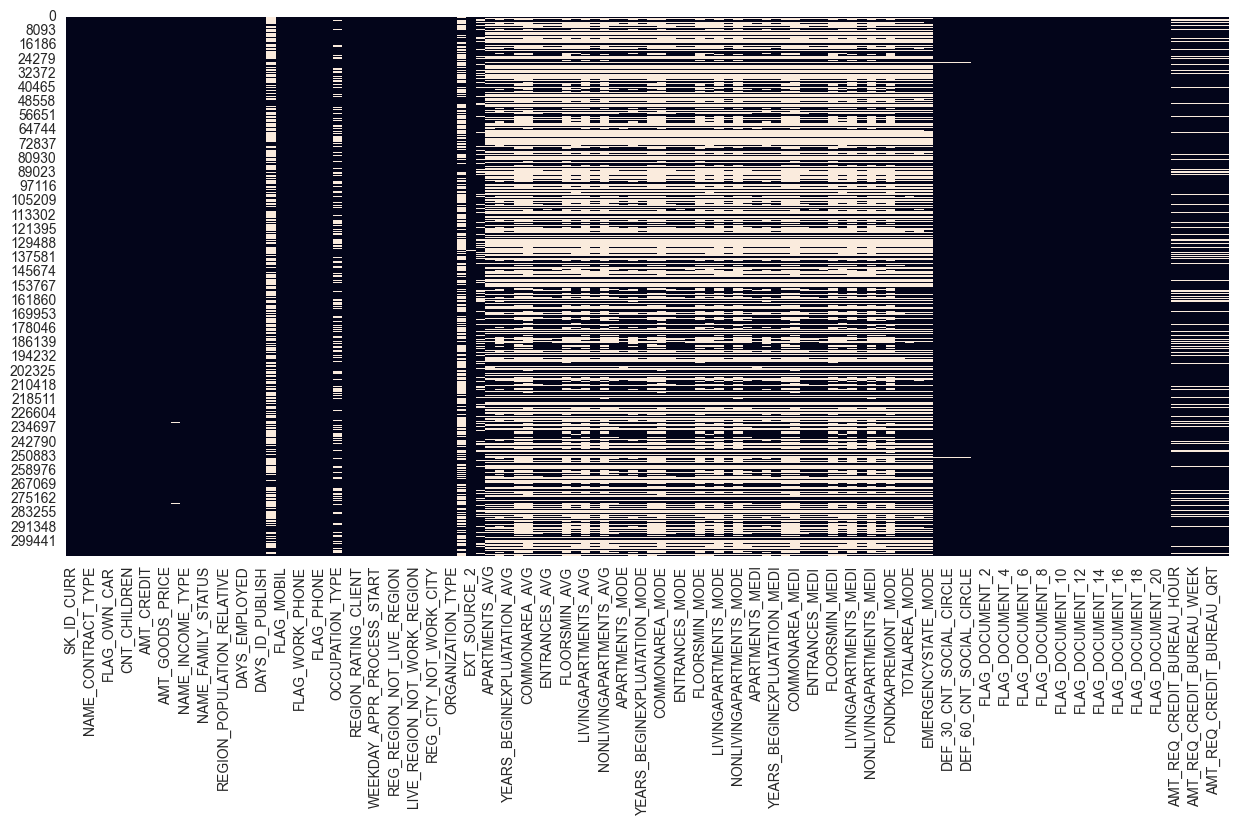

In [9]:
########## Valeurs manquantes ##########

# Identification des valeurs manquantes par variable :
fonctions.nan_detection(df_train)

In [10]:
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [11]:
df_train.select_dtypes(include = ['float64']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

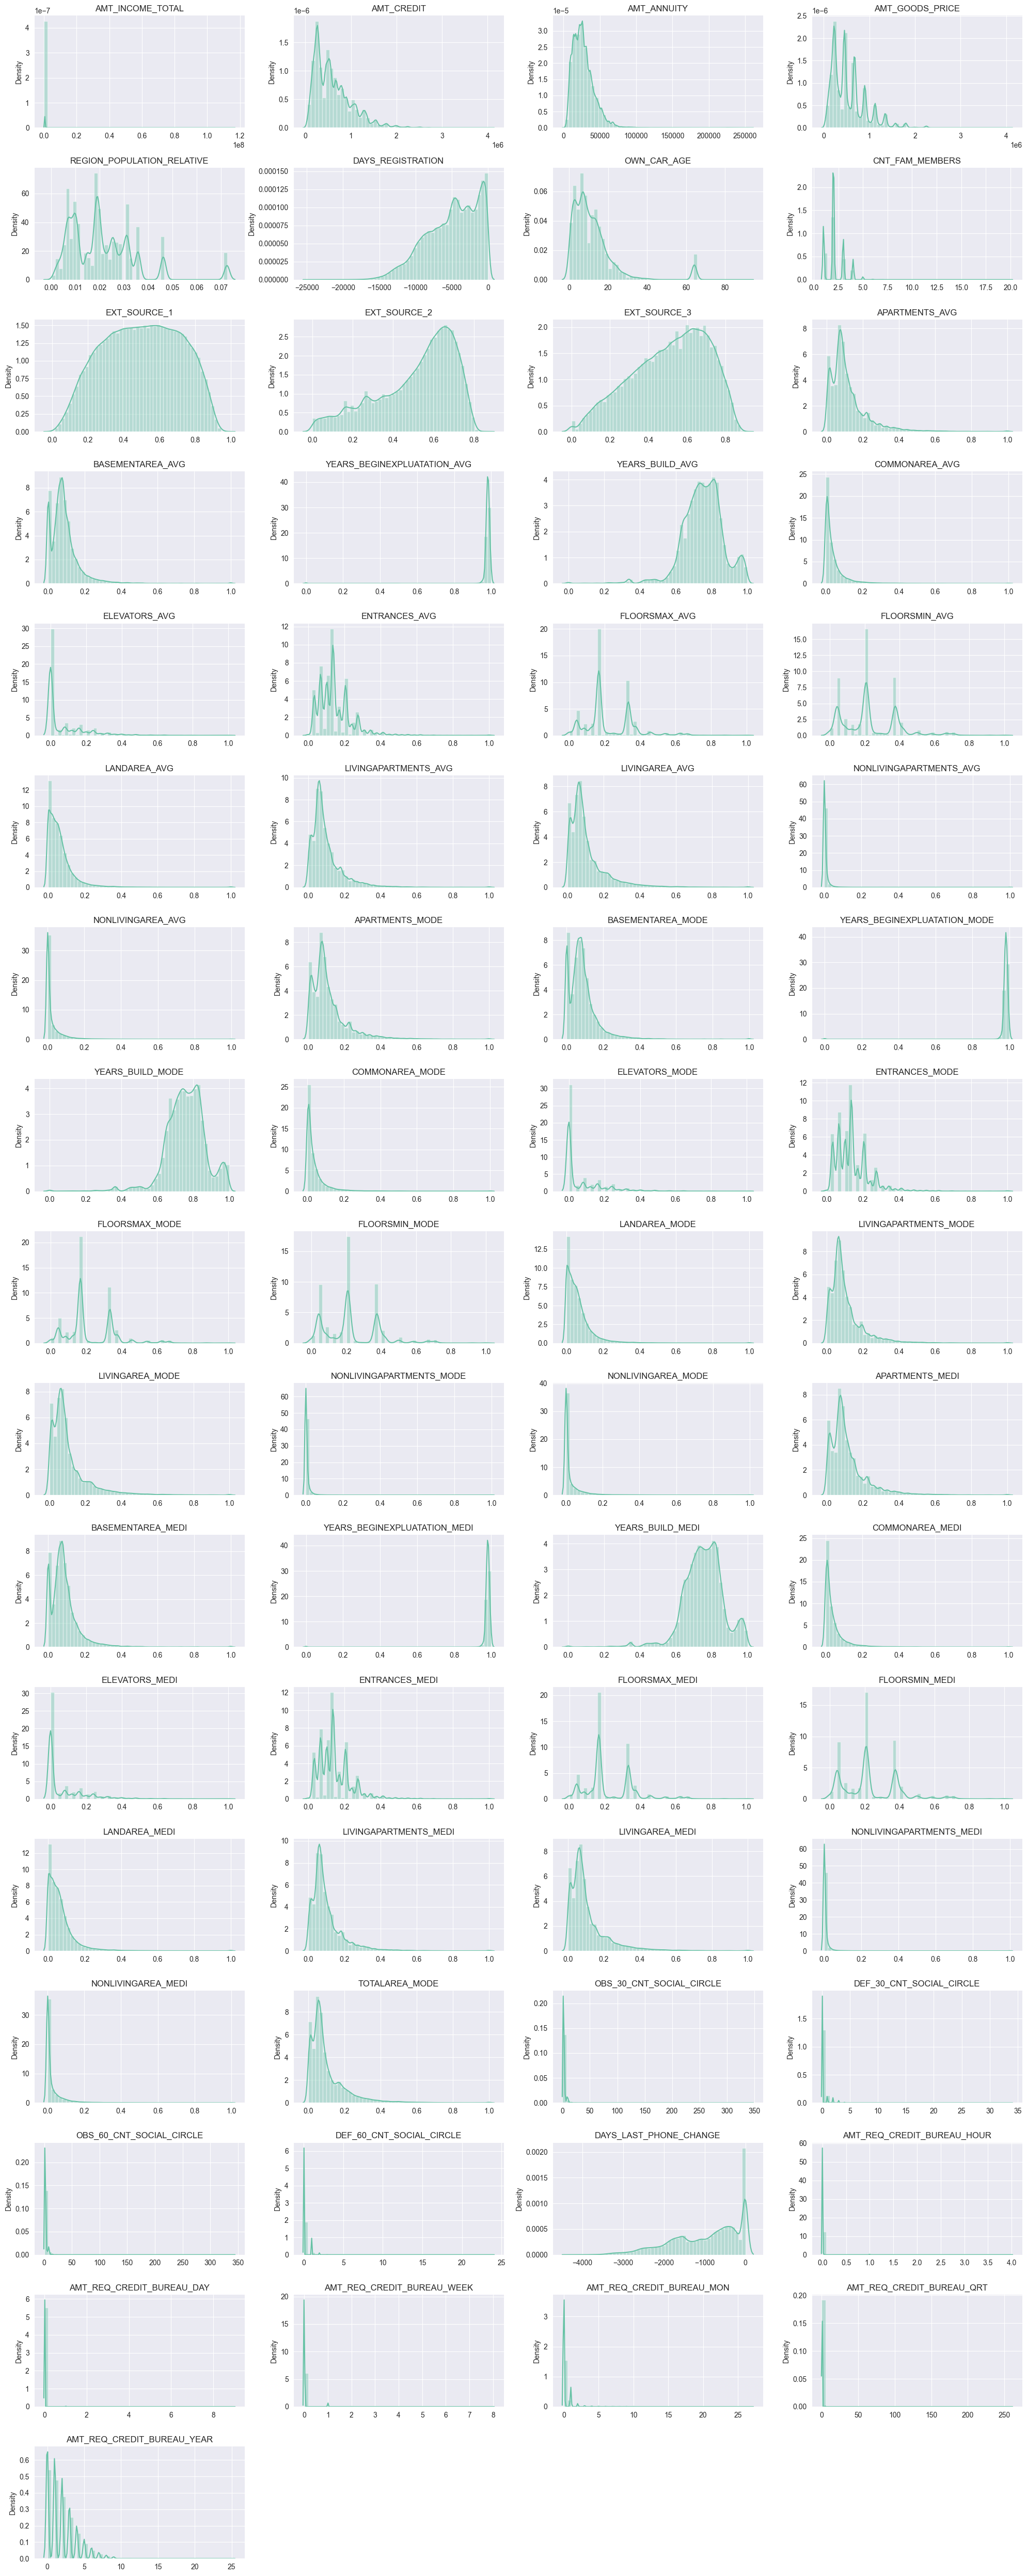

In [12]:
# Displots des variables quantitatives (variables continues seulement)

columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 50))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 4, index + 1)
    sns.distplot(x = df_train[col])
    plt.title(col)
    sns.despine() # pour enlever limites du graph en haut et à droite

figure.tight_layout()
plt.show()

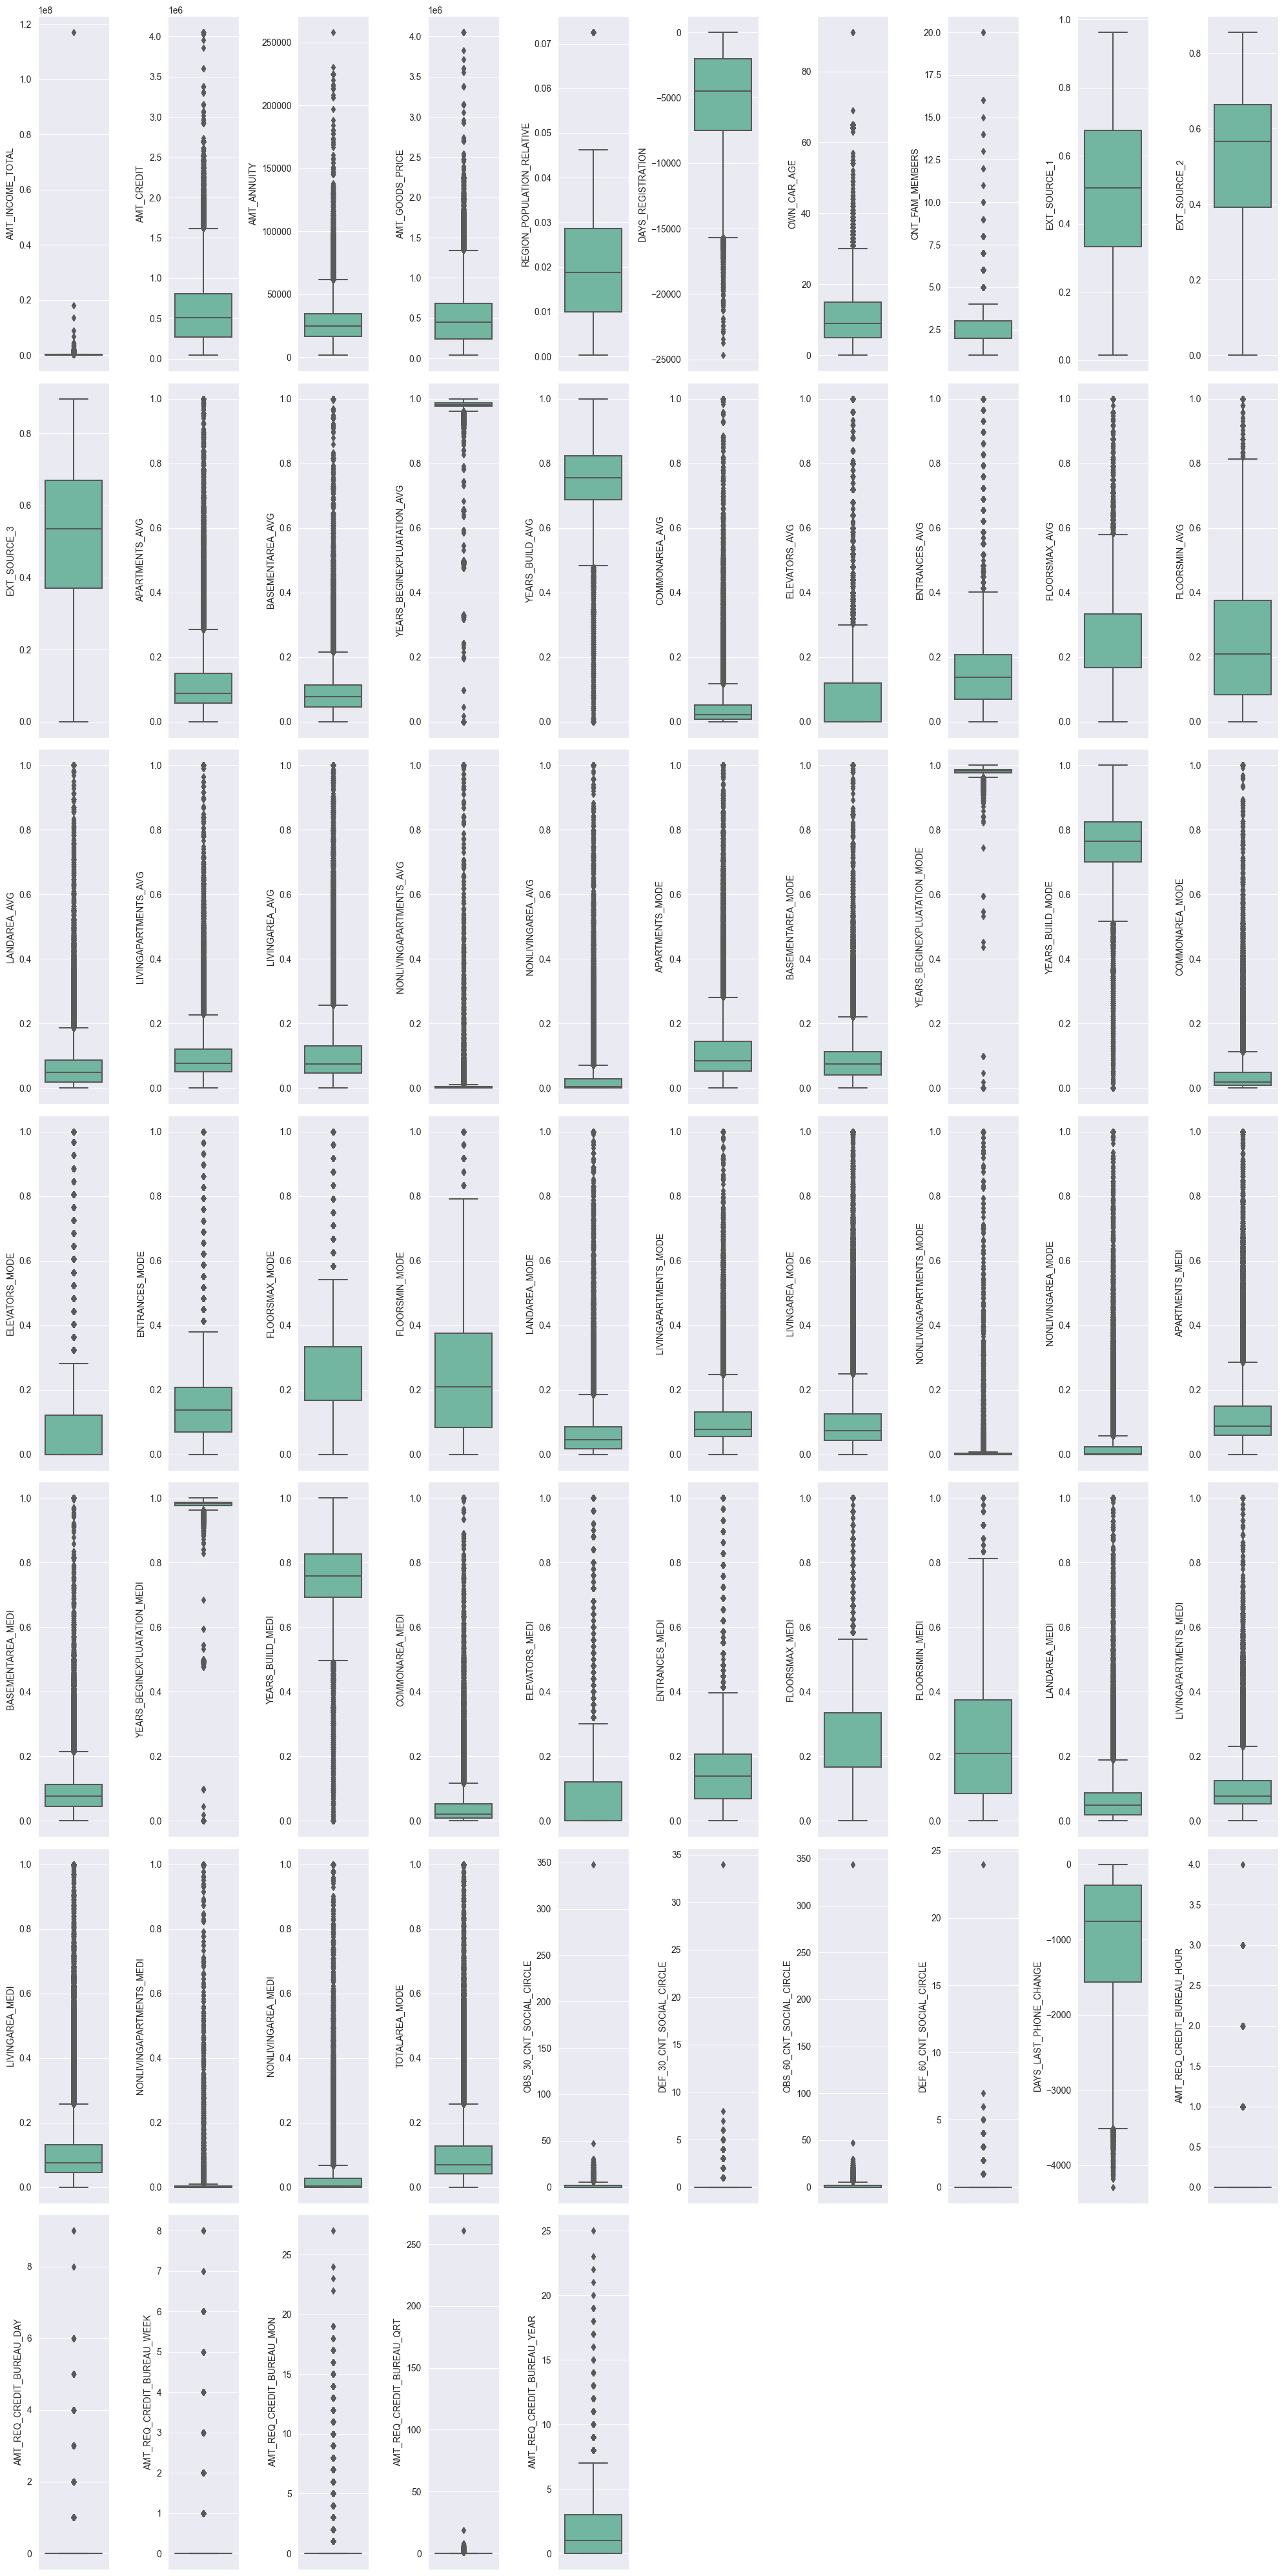

In [13]:
# Boxplots des variables quantitatives

columns = df_train.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 40))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df_train)
figure.tight_layout()
plt.show()

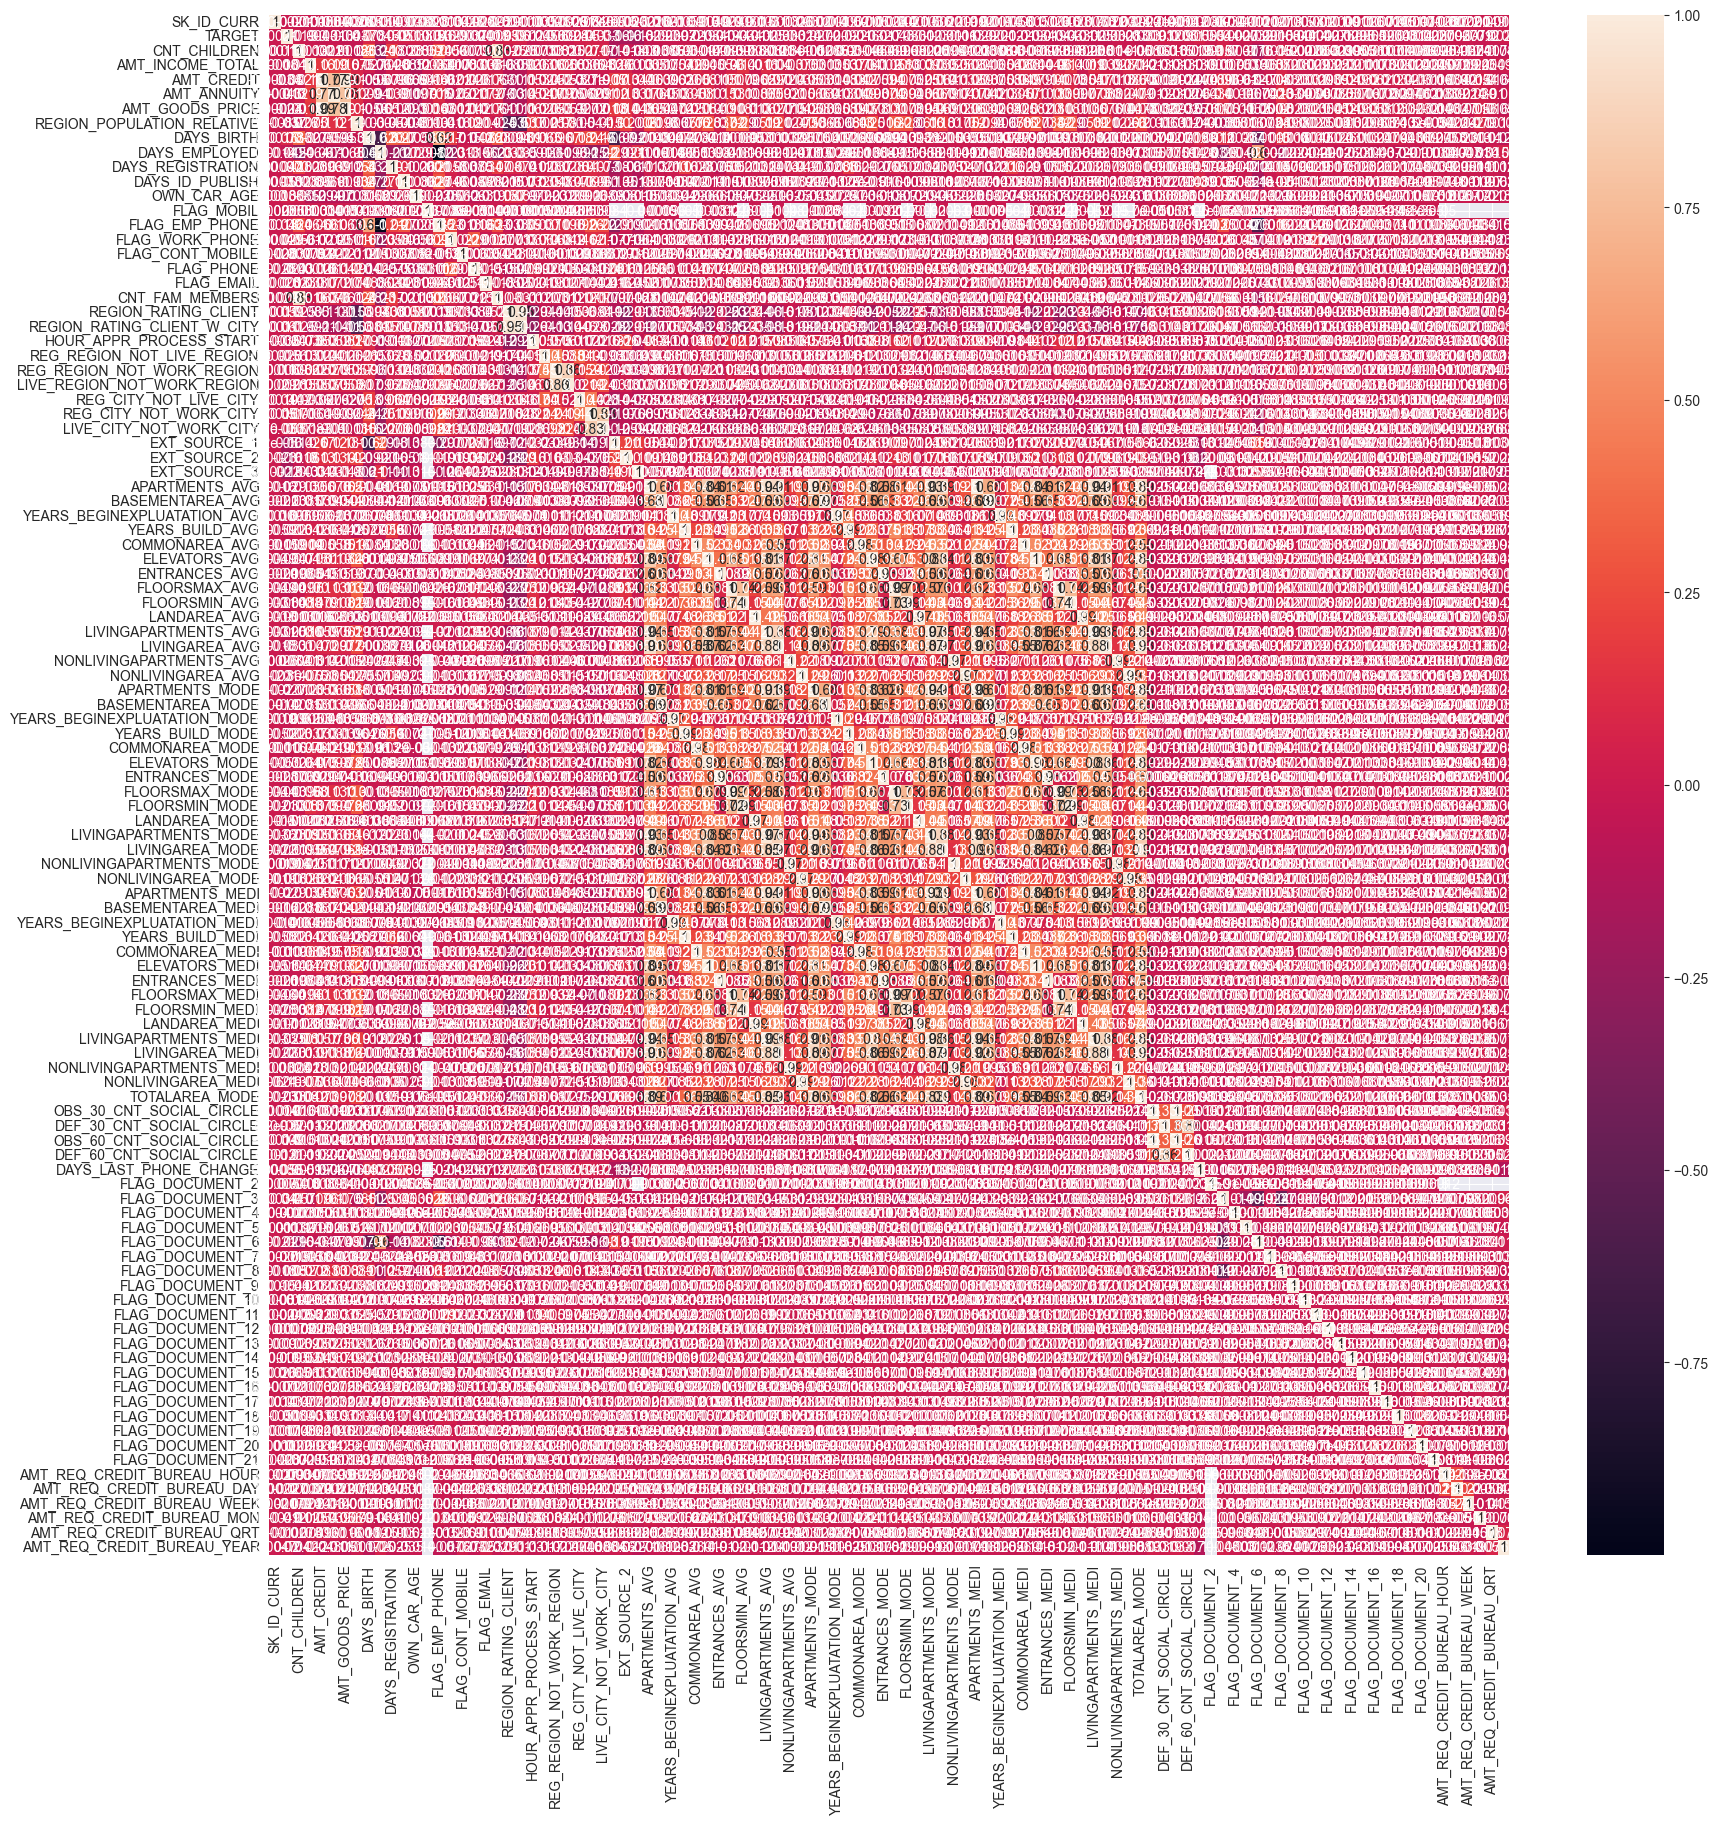

In [14]:
# Matrice de corrélations
plt.figure(figsize = (20, 20))
try:
    sns.heatmap(df_train.corr(numeric_only = True), annot = True)
except:
    sns.heatmap(df_train.corr(), annot = True)
plt.show()

### application_test.csv

In [15]:
########## df test -> sans target ##########
df_test = pd.read_csv('data/application_test.csv')
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [16]:
df_test.shape

(48744, 121)

In [17]:
df_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [19]:
fonctions.remove_duplicates(df_test)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 1404419

Pourcentage de valeurs manquantes : 23.81


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
COMMONAREA_MODE                                       33495   
COMMONAREA_MEDI                                       33495   
COMMONAREA_AVG                                        33495   
NONLIVINGAPARTMENTS_MEDI                              33347   
NONLIVINGAPARTMENTS_AVG                               33347   
NONLIVINGAPARTMENTS_MODE                              33347   
FONDKAPREMONT_MODE                                    32797   
LIVINGAPARTMENTS_MODE                                 32780   
LIVINGAPARTMENTS_MEDI                                 32780   
LIVINGAPARTMENTS_AVG                                  32780   
FLOORSMIN_MEDI                                        32466   
FLOORSMIN_MODE                                        32466   
FLOORSMIN_AVG                                         32466   
OWN_CAR_AGE                                           32312   
YEARS_BUILD_AVG                                       31818   
YEARS_BUILD_MEDI                                      31818   
YEARS_BUILD_MODE                                      31818   
LANDAREA_MODE                                         28254   
LANDAREA_AVG                                          28254   
LANDAREA_MEDI                                         28254   
BASEMENTAREA_MEDI                                     27641   
BASEMENTAREA_AVG                                      27641   
BASEMENTAREA_MODE                                     27641   
NONLIVINGAREA_MEDI                                    26084   
NONLIVINGAREA_MODE                                    26084   
NONLIVINGAREA_AVG                                     26084   
ELEVATORS_MEDI                                        25189   
ELEVATORS_MODE                                        25189   
ELEVATORS_AVG                                         25189   
WALLSMATERIAL_MODE                                    23893   
APARTMENTS_MODE                                       23887   
APARTMENTS_MEDI                                       23887   
APARTMENTS_AVG                                        23887   
HOUSETYPE_MODE                                        23619   
ENTRANCES_MODE                                        23579   
ENTRANCES_MEDI                                        23579   
ENTRANCES_AVG                                         23579   
LIVINGAREA_AVG                                        23552   
LIVINGAREA_MEDI                                       23552   
LIVINGAREA_MODE                                       23552   
FLOORSMAX_MEDI                                        23321   
FLOORSMAX_MODE                                        23321   
FLOORSMAX_AVG                                         23321   
YEARS_BEGINEXPLUATATION_MEDI                          22856   
YEARS_BEGINEXPLUATATION_MODE                          22856   
YEARS_BEGINEXPLUATATION_AVG                           22856   
TOTALAREA_MODE                                        22624   
EMERGENCYSTATE_MODE                                   22209   
EXT_SOURCE_1                                          20532   
OCCUPATION_TYPE                                       15605   
EXT_SOURCE_3                                           8668   
AMT_REQ_CREDIT_BUREAU_MON                              6049   
AMT_REQ_CREDIT_BUREAU_HOUR                             6049   
AMT_REQ_CREDIT_BUREAU_QRT                              6049   
AMT_REQ_CREDIT_BUREAU_WEEK                             6049   
AMT_REQ_CREDIT_BUREAU_DAY                              6049   
AMT_REQ_CREDIT_BUREAU_YEAR                             6049   
NAME_TYPE_SUITE                                         911   
DEF_60_CNT_SOCIAL_CIRCLE                                 29   
OBS_60_CNT_SOCIAL_CIRCLE                                 29   
DEF_30_CNT_SOCIAL_CIRCLE                                 29   
OBS_30_CNT_SOCIAL_CIRCLE                                 29   
AMT_ANNUITY                                              24  


Heatmap des valeurs manquantes : 



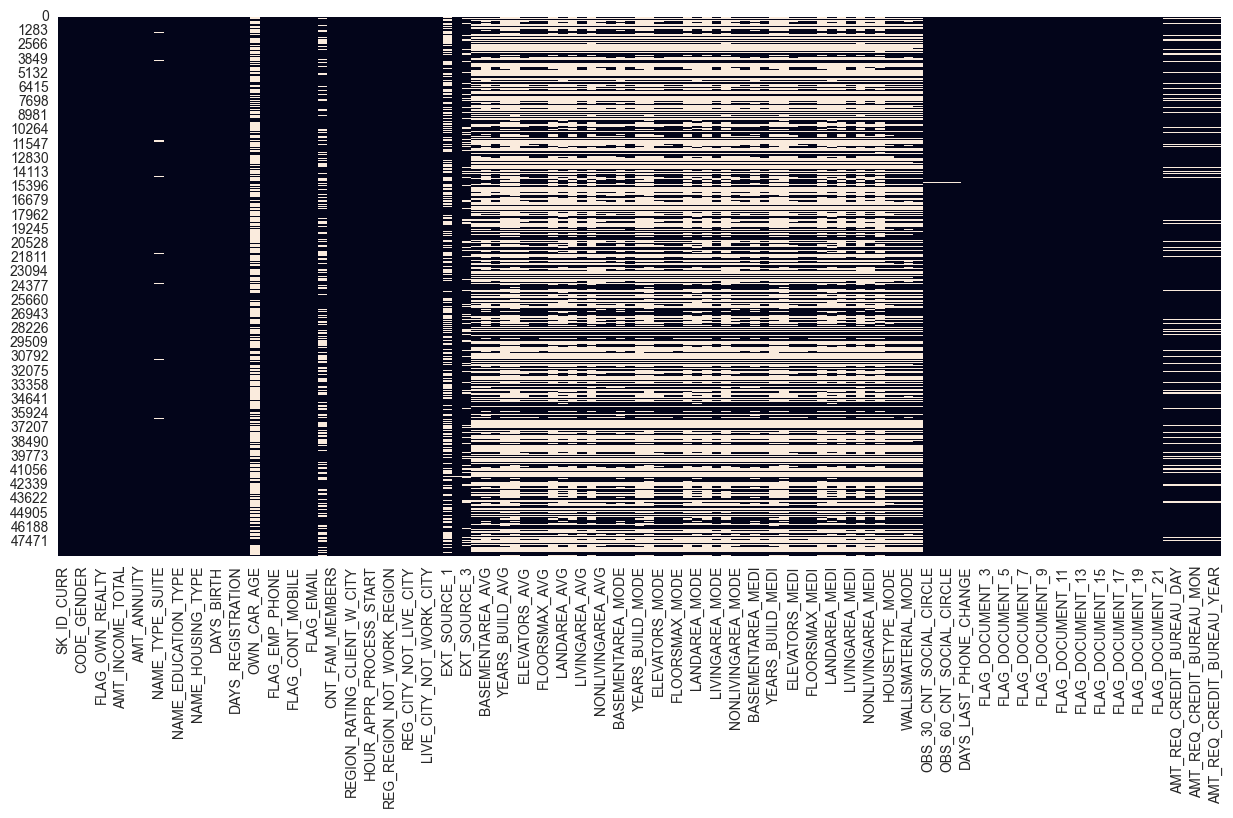

In [20]:
fonctions.nan_detection(df_test)

### bureau.csv

In [21]:
df_bureau = pd.read_csv('data/bureau.csv')
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [22]:
df_bureau.shape

(1716428, 17)

In [23]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [24]:
fonctions.remove_duplicates(df_bureau)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 3939947

Pourcentage de valeurs manquantes : 13.5


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
AMT_ANNUITY                                   1226791                    71.47
AMT_CREDIT_MAX_OVERDUE                        1124488                    65.51
DAYS_ENDDATE_FACT                              633653                    36.92
AMT_CREDIT_SUM_LIMIT                           591780                    34.48
AMT_CREDIT_SUM_DEBT                            257669                    15.01
DAYS_CREDIT_ENDDATE                            105553                     6.15
AMT_CREDIT_SUM                                     13                     0.00


Heatmap des valeurs manquantes : 



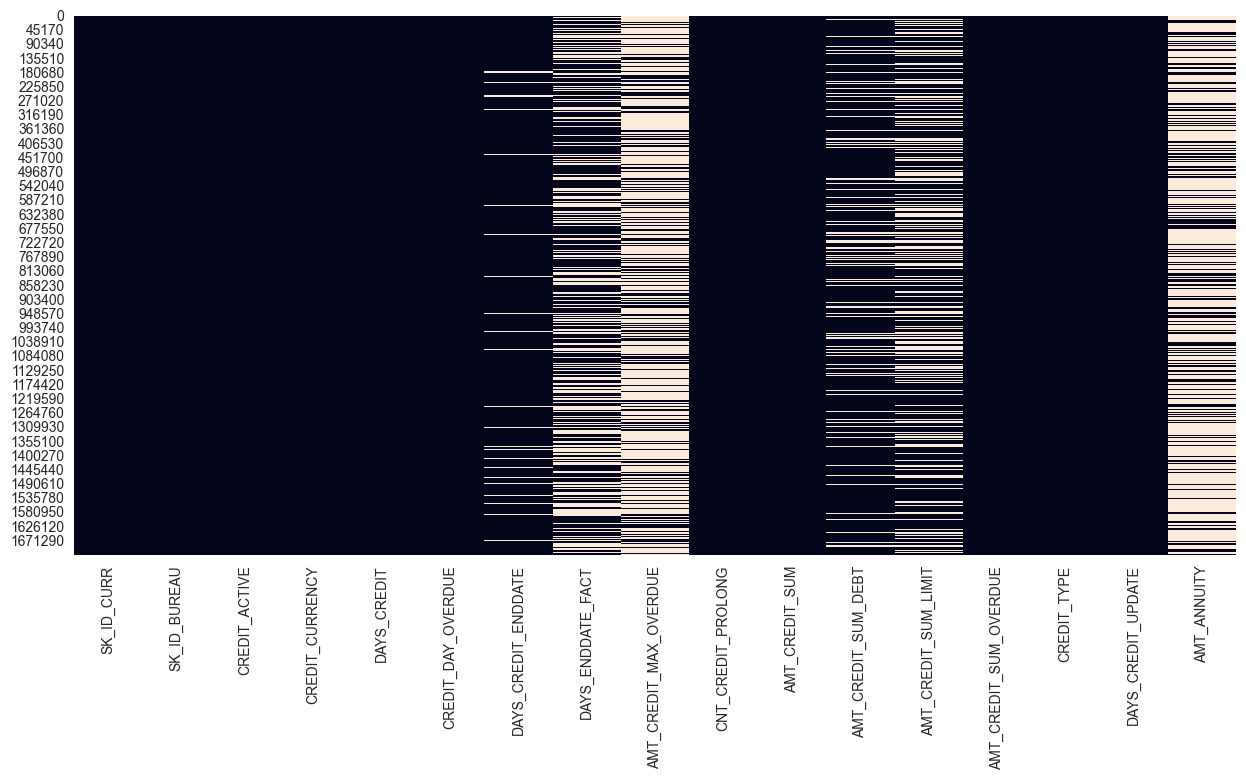

In [25]:
fonctions.nan_detection(df_bureau)

### bureau_balance.csv

In [26]:
df_bureau_balance = pd.read_csv('data/bureau_balance.csv')
df_bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [27]:
df_bureau_balance.shape

(27299925, 3)

In [28]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [29]:
fonctions.remove_duplicates(df_bureau_balance)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


In [30]:
fonctions.nan_detection(df_bureau_balance)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


### credit_card_balance.csv

In [31]:
df_credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
df_credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [32]:
df_credit_card_balance.shape

(3840312, 23)

In [33]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [34]:
fonctions.remove_duplicates(df_credit_card_balance)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 5877356

Pourcentage de valeurs manquantes : 6.65


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
AMT_PAYMENT_CURRENT                                767988   
AMT_DRAWINGS_ATM_CURRENT                           749816   
AMT_DRAWINGS_OTHER_CURRENT                         749816   
AMT_DRAWINGS_POS_CURRENT                           749816   
CNT_DRAWINGS_ATM_CURRENT                           749816   
CNT_DRAWINGS_OTHER_CURRENT                         749816   
CNT_DRAWINGS_POS_CURRENT                           749816   
AMT_INST_MIN_REGULARITY                            305236   
CNT_INSTALMENT_MATURE_CUM                          305236   

                            % de valeurs manquantes  
AMT_PAYMENT_CURRENT                           20.00  
AMT_DRAWINGS_ATM_CURRENT                      19.52  
AMT_DRAWINGS_OTHER_CURRENT                    19.52  
AMT_DRAWINGS_POS_CURRENT                      19.52  
CNT_DRAWINGS_ATM_CURRENT                      19.52  
CNT_DRAWINGS_OTHER_CURRENT                    19.52  
CNT_DRAWINGS_POS_CURRENT                      19.52  
AMT_INST_MIN_REGULARITY                        7.95  
CNT_INSTALMENT_MATURE_CUM                      7.95


Heatmap des valeurs manquantes : 



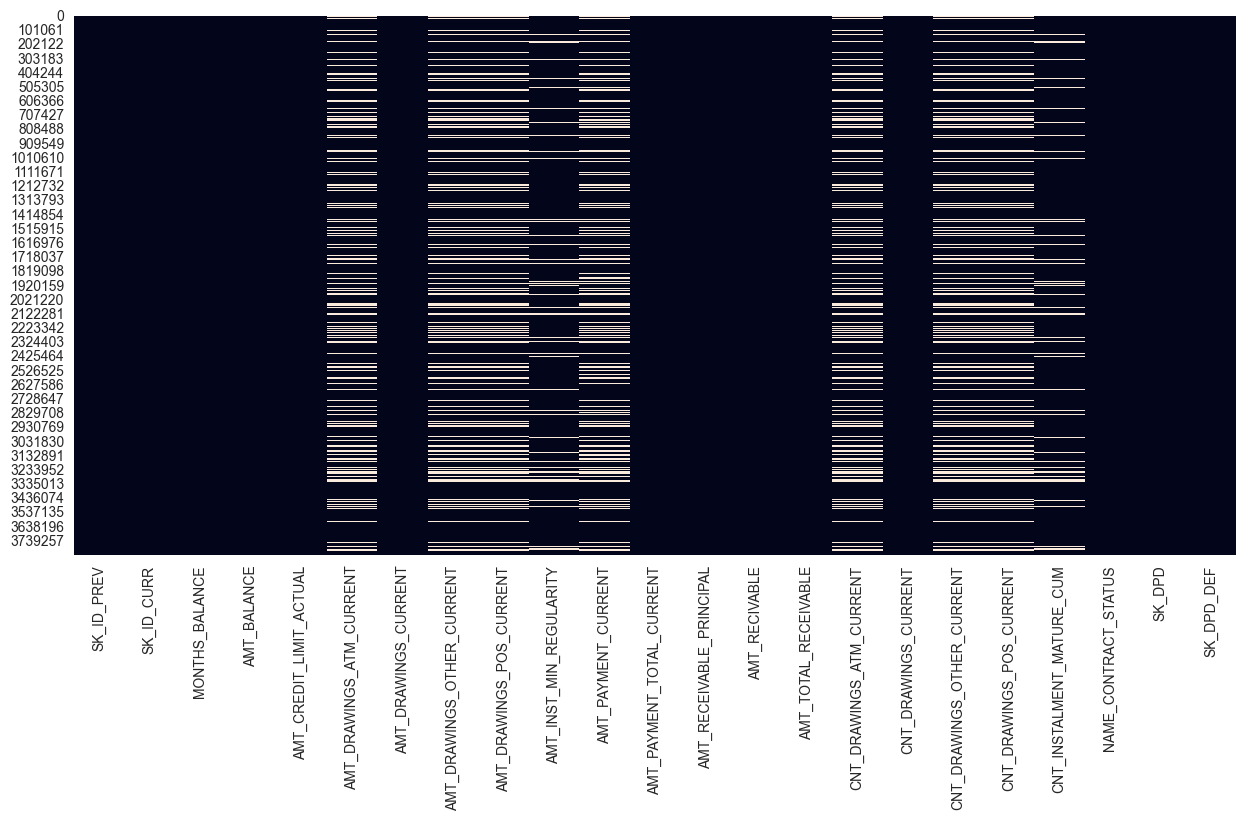

In [35]:
fonctions.nan_detection(df_credit_card_balance)

### HomeCredit_columns_description.csv

In [41]:
df_homecredit = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = 'latin1')
df_homecredit.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [42]:
df_homecredit.shape

(219, 5)

In [43]:
df_homecredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


In [44]:
fonctions.remove_duplicates(df_homecredit)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 133

Pourcentage de valeurs manquantes : 12.15


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
Special                            133                    60.73


Heatmap des valeurs manquantes : 



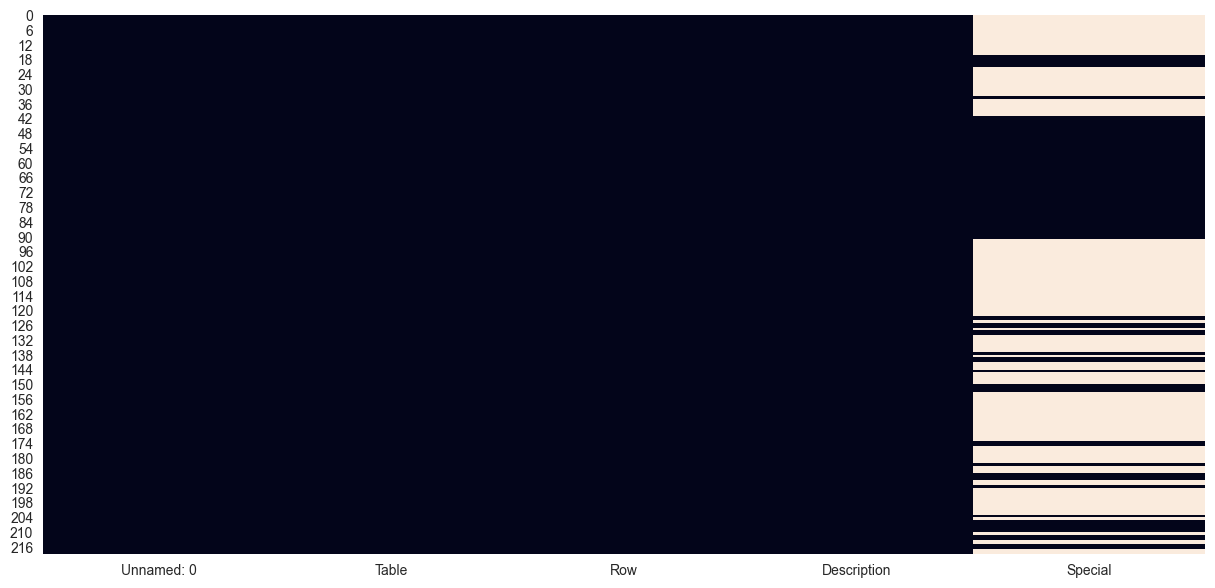

In [45]:
fonctions.nan_detection(df_homecredit)

### installments_payments.csv

In [46]:
df_installments = pd.read_csv('data/installments_payments.csv')
df_installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN  

[13605401 rows x 8 columns]

In [47]:
df_installments.shape

(13605401, 8)

In [48]:
df_installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [49]:
fonctions.remove_duplicates(df_installments)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 5810

Pourcentage de valeurs manquantes : 0.01


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
DAYS_ENTRY_PAYMENT                           2905                     0.02
AMT_PAYMENT                                  2905                     0.02


Heatmap des valeurs manquantes : 



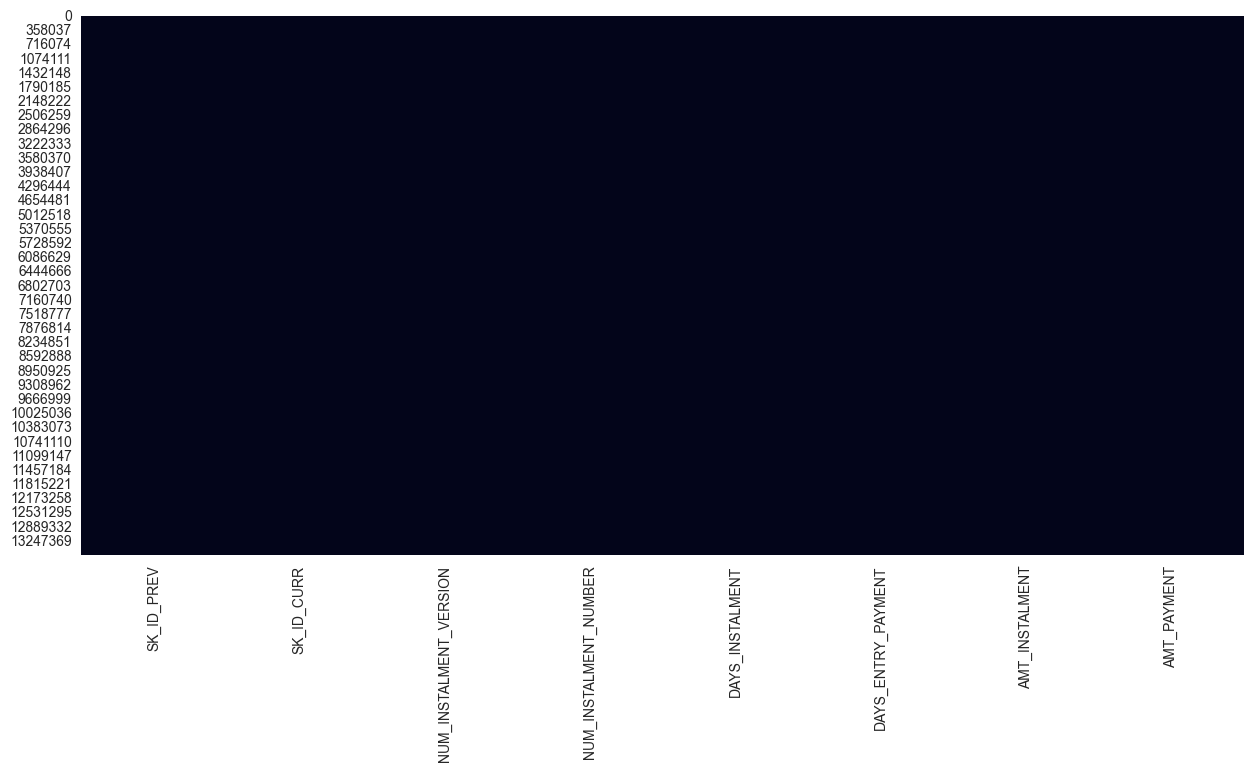

In [50]:
fonctions.nan_detection(df_installments)

### POS_CASH_balance.csv

In [51]:
df_pos_cash = pd.read_csv('data/POS_CASH_balance.csv')
df_pos_cash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [52]:
df_pos_cash.shape

(10001358, 8)

In [53]:
df_pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [54]:
fonctions.remove_duplicates(df_pos_cash)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 52158

Pourcentage de valeurs manquantes : 0.07


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
CNT_INSTALMENT                                 26071                     0.26
CNT_INSTALMENT_FUTURE                          26087                     0.26


Heatmap des valeurs manquantes : 



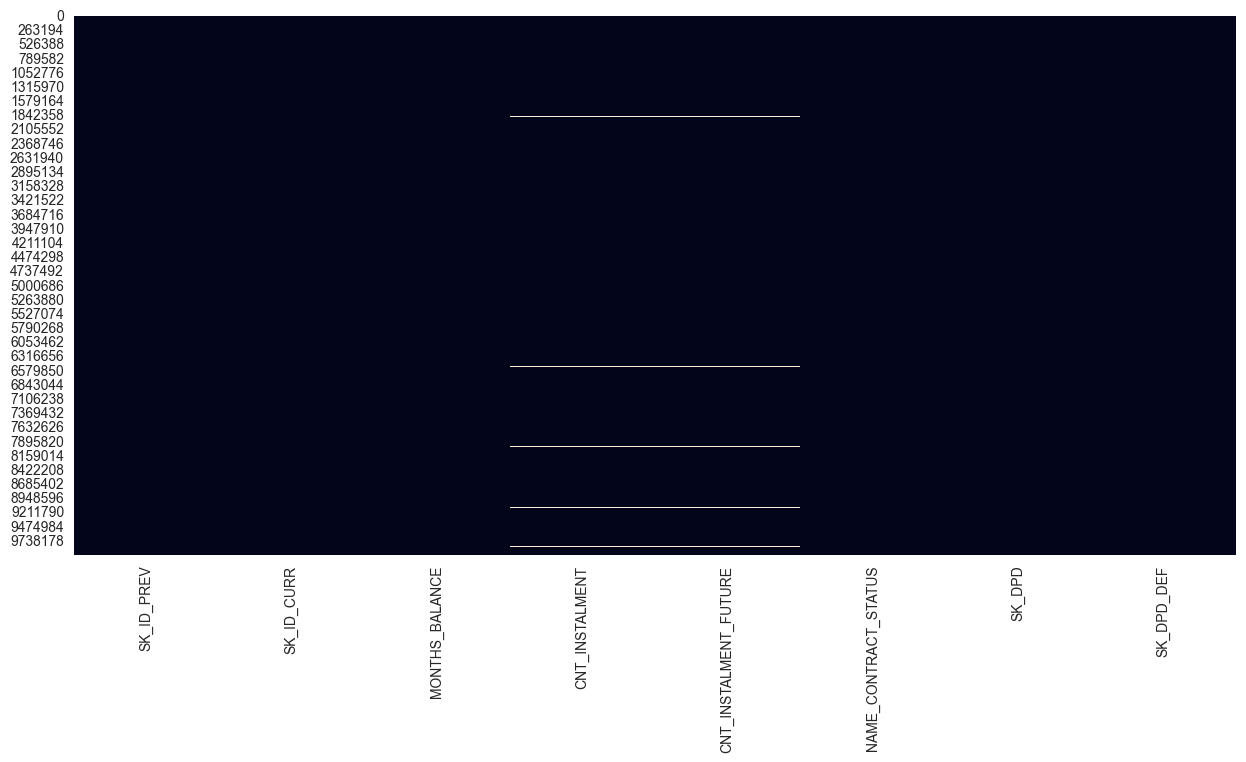

In [55]:
fonctions.nan_detection(df_pos_cash)

### previous_application.csv

In [56]:
df_previous_application = pd.read_csv('data/previous_application.csv')
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [57]:
df_previous_application.shape

(1670214, 37)

In [58]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [59]:
fonctions.remove_duplicates(df_previous_application)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 11109336

Pourcentage de valeurs manquantes : 17.98


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
RATE_INTEREST_PRIMARY                            1664263   
RATE_INTEREST_PRIVILEGED                         1664263   
AMT_DOWN_PAYMENT                                  895844   
RATE_DOWN_PAYMENT                                 895844   
NAME_TYPE_SUITE                                   820405   
DAYS_FIRST_DRAWING                                673065   
DAYS_FIRST_DUE                                    673065   
DAYS_LAST_DUE_1ST_VERSION                         673065   
DAYS_LAST_DUE                                     673065   
DAYS_TERMINATION                                  673065   
NFLAG_INSURED_ON_APPROVAL                         673065   
AMT_GOODS_PRICE                                   385515   
AMT_ANNUITY                                       372235   
CNT_PAYMENT                                       372230   
PRODUCT_COMBINATION                                  346   
AMT_CREDIT                                             1   

                           % de valeurs manquantes  
RATE_INTEREST_PRIMARY                        99.64  
RATE_INTEREST_PRIVILEGED                     99.64  
AMT_DOWN_PAYMENT                             53.64  
RATE_DOWN_PAYMENT                            53.64  
NAME_TYPE_SUITE                              49.12  
DAYS_FIRST_DRAWING                           40.30  
DAYS_FIRST_DUE                               40.30  
DAYS_LAST_DUE_1ST_VERSION                    40.30  
DAYS_LAST_DUE                                40.30  
DAYS_TERMINATION                             40.30  
NFLAG_INSURED_ON_APPROVAL                    40.30  
AMT_GOODS_PRICE                              23.08  
AMT_ANNUITY                                  22.29  
CNT_PAYMENT                                  22.29  
PRODUCT_COMBINATION                           0.02  
AMT_CREDIT                                    0.00


Heatmap des valeurs manquantes : 



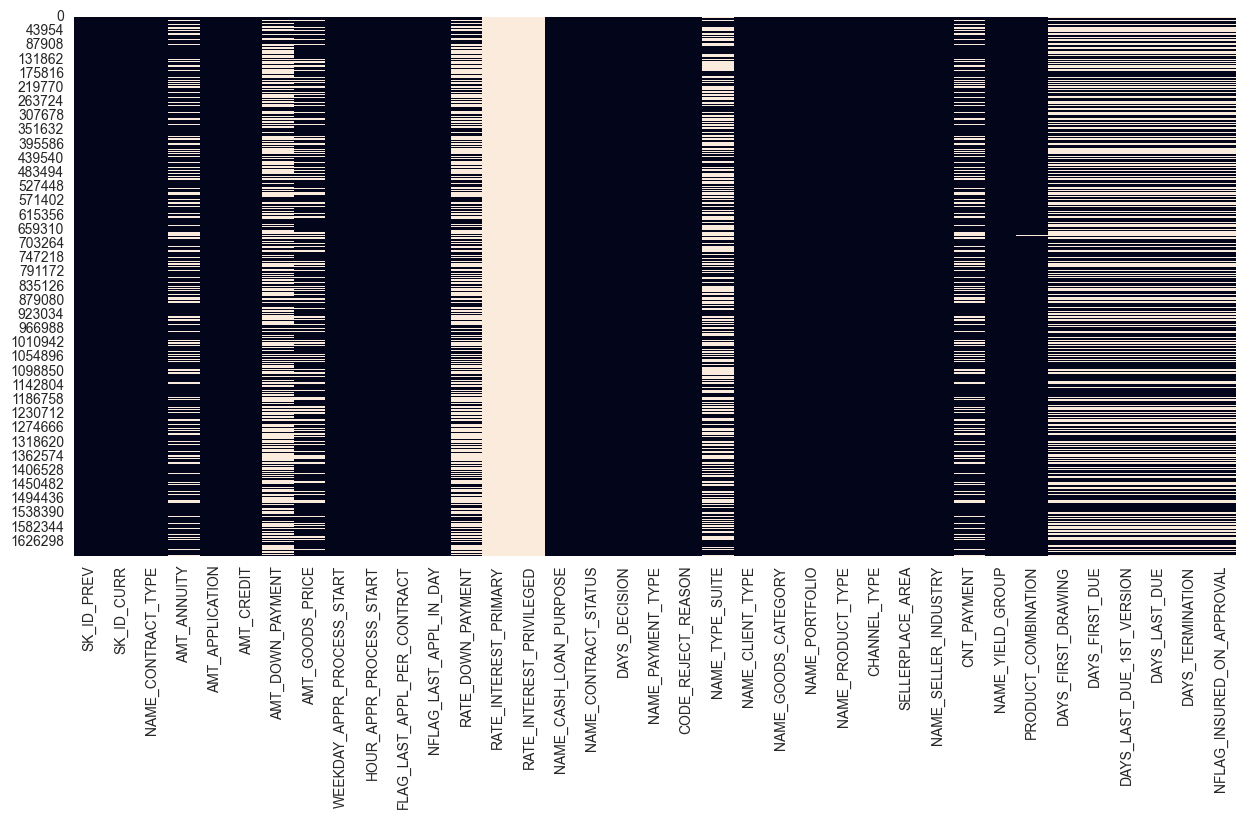

In [60]:
fonctions.nan_detection(df_previous_application)

### sample_submission.csv

In [61]:
df_sample_submission = pd.read_csv('data/sample_submission.csv')
df_sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [62]:
df_sample_submission.shape

(48744, 2)

In [63]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [64]:
fonctions.remove_duplicates(df_sample_submission)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


In [65]:
fonctions.nan_detection(df_sample_submission)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0
